# BANK MARKETING 

## 1- Prétraitements

Ici , nous allons lancer la phase de Préprocessing et EDA 

In [13]:
#Import des bibliothèques 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
#lecture du dataset 

df = pd.read_csv("data/bank-full.csv", sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [15]:
# connaitre le type des colonnes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [16]:
# connaitre les basiques stats 
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [17]:
# vérifier les valeurs manquantes

df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [18]:
# vérification des doublons
print("Nombre de doublons :", df.duplicated().sum())
df.drop_duplicates(inplace=True)

Nombre de doublons : 0


## 2- EDA

Clients YES : 5289 (11.7%)
Clients NO  : 39922 (88.3%)


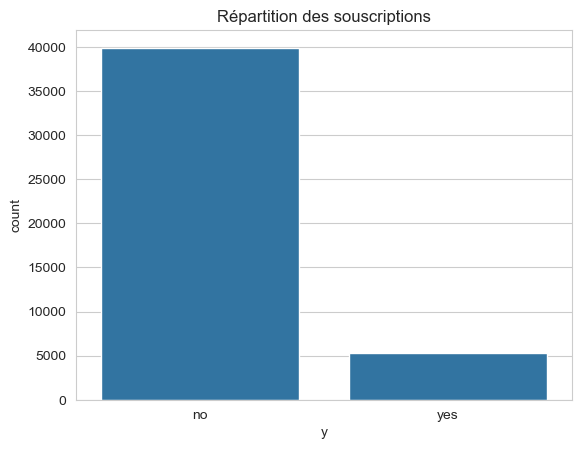

In [25]:
# Nombre de personnes ayant souscrit ou non 
nb_yes = (df['y'] == 'yes').sum()
nb_no = (df['y'] == 'no').sum()
total = len(df)
pct_yes = nb_yes / total * 100
pct_no = nb_no / total * 100
print(f"Clients YES : {nb_yes} ({pct_yes:.1f}%)")
print(f"Clients NO  : {nb_no} ({pct_no:.1f}%)")
sns.countplot(x='y', data=df)
plt.title("Répartition des souscriptions")
plt.show()

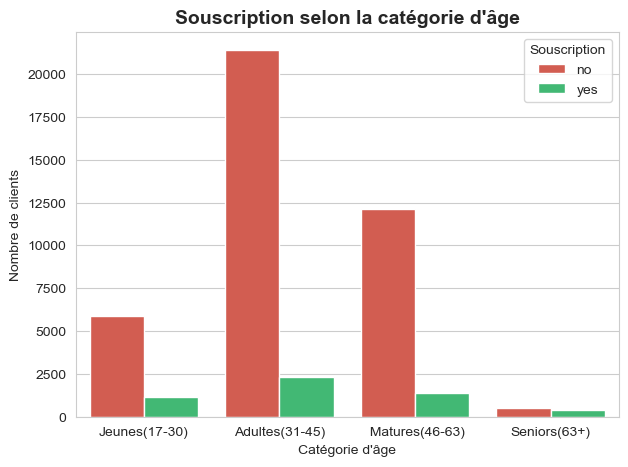

In [36]:
#Montrer si les souscripteurs sont plus jeunes ou plus âgés

df['age_group'] = pd.cut(
    df['age'],
    bins=[17, 30, 45, 63, 100],
    labels=['Jeunes(17-30)', 'Adultes(31-45)', ' Matures(46-63)', 'Seniors(63+)']
)
df[['age', 'age_group']].head()
plt.figure(figsize=(7,5))
sns.set_style("whitegrid")

sns.countplot(
    x='age_group',
    hue='y',
    data=df,
    palette={'yes':'#2ecc71', 'no':'#e74c3c'}
)

plt.title("Souscription selon la catégorie d'âge", fontsize=14, weight='bold')
plt.xlabel("Catégorie d'âge")
plt.ylabel("Nombre de clients")
plt.legend(title="Souscription")
plt.show()

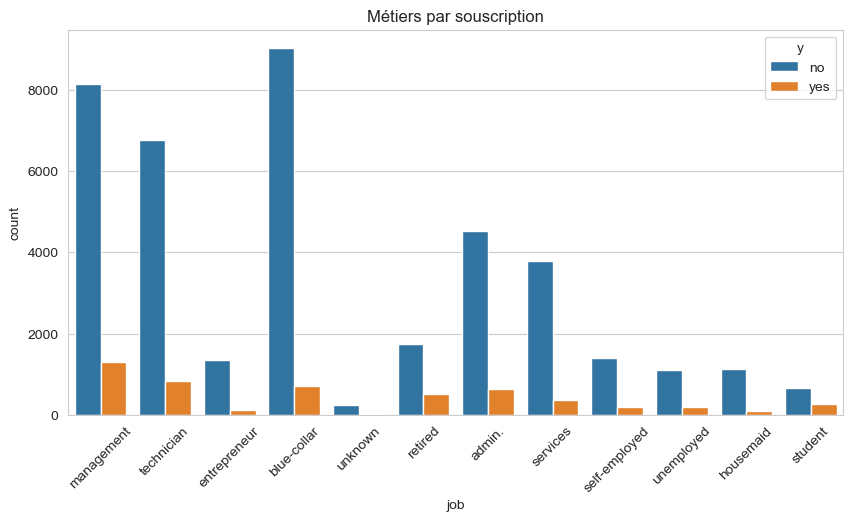

In [33]:
#montrer quels métiers sont les plus susceptibles de dire OUI au dépôt à terme.
plt.figure(figsize=(10,5))
sns.countplot(x='job', hue='y', data=df)
plt.xticks(rotation=45)
plt.title("Métiers par souscription")
plt.show()

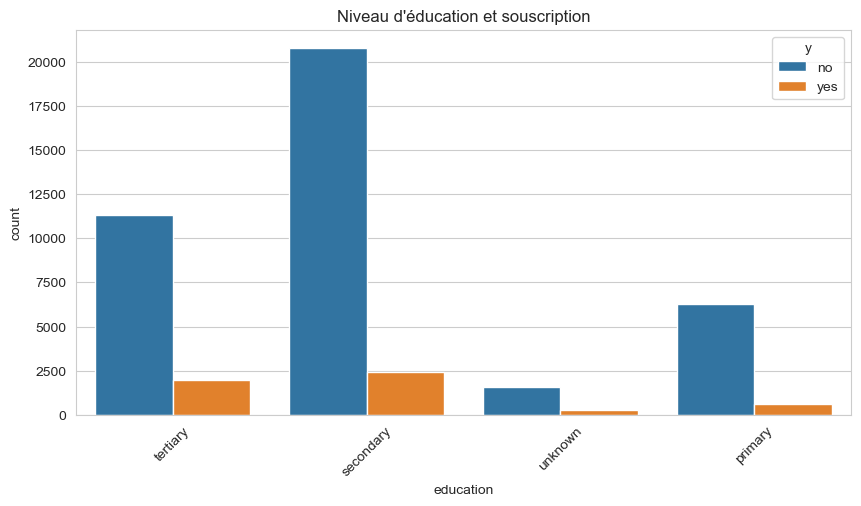

In [34]:
#montrer quels éductaions sont les plus susceptibles de dire OUI au dépôt à terme.
plt.figure(figsize=(10,5))
sns.countplot(x='education', hue='y', data=df)
plt.xticks(rotation=45)
plt.title("Niveau d'éducation et souscription")
plt.show()

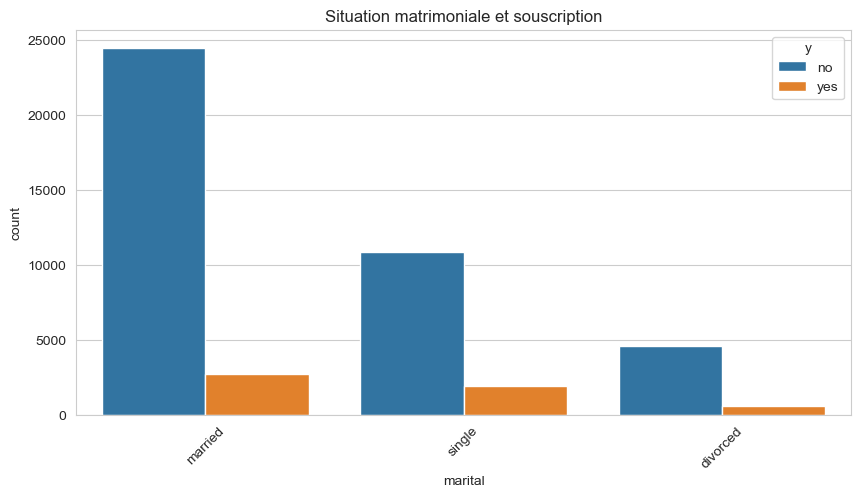

In [37]:
#montrer quels sont les situations matrimoniales les plus susceptibles de dire OUI au dépôt à terme.
plt.figure(figsize=(10,5))
sns.countplot(x='marital', hue='y', data=df)
plt.xticks(rotation=45)
plt.title("Situation matrimoniale et souscription")
plt.show()

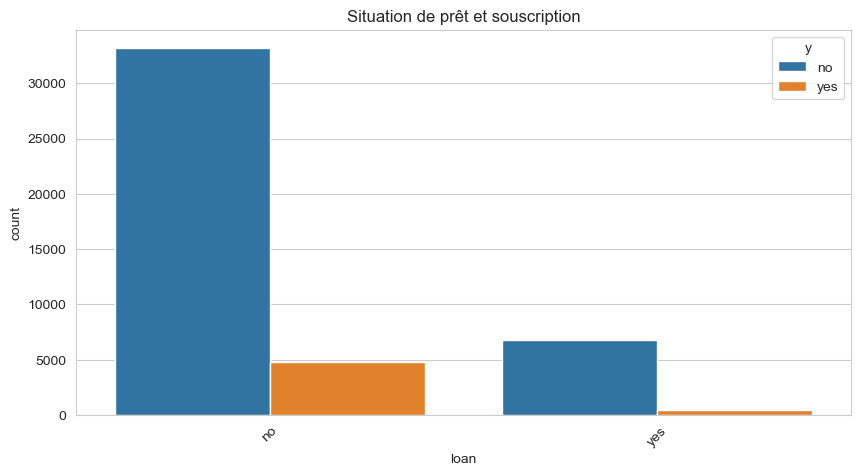

In [39]:
#montrer si les peronnes ayant un prêt sont les plus susceptibles de dire OUI au dépôt à terme.
plt.figure(figsize=(10,5))
sns.countplot(x='loan', hue='y', data=df)
plt.xticks(rotation=45)
plt.title("Situation de prêt et souscription")
plt.show()

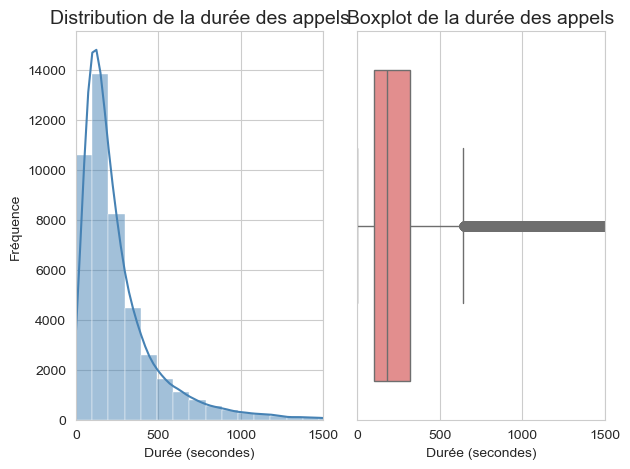

In [42]:
plt.subplot(1, 2, 1)
sns.histplot(df['duration'], bins=50, kde=True, color='steelblue')
plt.title('Distribution de la durée des appels', fontsize=14)
plt.xlabel('Durée (secondes)')
plt.ylabel('Fréquence')
plt.xlim(0, 1500)  # On coupe à 1500s pour meilleure lisibilité

plt.subplot(1, 2, 2)
sns.boxplot(x=df['duration'], color='lightcoral')
plt.title('Boxplot de la durée des appels', fontsize=14)
plt.xlabel('Durée (secondes)')
plt.xlim(0, 1500)

plt.tight_layout()
plt.show()